In [11]:
import pandas as pd
import numpy as np
import os

In [12]:
df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')

files = [file for file in os.listdir('./Sales_Data')]

all_month_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_Data/'+ file)
    all_month_data = pd.concat([all_month_data,df])

all_month_data.to_csv("all_data.csv",index=False)
    

## Read updated data frame

In [13]:
all_data = pd.read_csv('all_data.csv')

In [14]:
all_data.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001

# Clean up the data!

### Drop NaN

In [15]:
all_data[all_data.isna().any(axis=1)]
all_data.dropna(how='all',inplace=True)

In [16]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

## add month

In [17]:
all_data['Month']=all_data['Order Date'].str[0:2].astype('int32')

In [18]:
all_data.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  Month  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4

In [21]:
all_data['Month2'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month  Month2  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4       4  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4       4  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4       4  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4       4  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4       4

In [20]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month  Month2  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4       4  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4       4  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4       4  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4       4  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4       4

## add sales column

In [22]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data

Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable                 2       11.95   
2        176559  Bose SoundSport Headphones                 1       99.99   
3        176560                Google Phone                 1      600.00   
4        176560            Wired Headphones                 1       11.99   
5        176561            Wired Headphones                 1       11.99   
...         ...                         ...               ...         ...   
186845   259353      AAA Batteries (4-pack)                 3        2.99   
186846   259354                      iPhone                 1      700.00   
186847   259355                      iPhone                 1      700.00   
186848   259356      34in Ultrawide Monitor                 1      379.99   
186849   259357        USB-C Charging Cable                 1       11.95   

            Order Date                         Purchase Address  Month  \
0       04/19/19 08:46             917 1st St, Dallas, TX 75001      4   
2       04/07/19 22:30        682 Chestnut St, Boston, MA 02215      4   
3       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001      4   
4       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001      4   
5       04/30/19 09:27        333 8th St, Los Angeles, CA 90001      4   
...                ...                                      ...    ...   
186845  09/17/19 20:56   840 Highland St, Los Angeles, CA 90001      9   
186846  09/01/19 16:00  216 Dogwood St, San Francisco, CA 94016      9   
186847  09/23/19 07:39     220 12th St, San Francisco, CA 94016      9   
186848  09/19/19 17:30   511 Forest St, San Francisco, CA 94016      9   
186849  09/30/19 00:18   250 Meadow St, San Francisco, CA 94016      9   

        Month2   Sales  
0            4   23.90  
2            4   99.99  
3            4  600.00  
4            4   11.99  
5            4   11.99  
...        ...     ...  
186845       9    8.97  
186846       9  700.00  
186847       9  700.00  
186848       9  379.99  
186849       9   11.95  

[185950 rows x 9 columns]

## Add City

In [26]:
def get_city(x):
    return x.split(",")[1].strip(" ")
def get_state(x):
    return x.split(",")[2].split(" ")[1]

all_data['city'] =  all_data['Purchase Address'].apply(lambda x : f"{get_city(x)} ({get_state(x)})")
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month  Month2  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4       4   
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4       4   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4       4   
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4       4   
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4       4   

    Sales              city  
0   23.90       Dallas (TX)  
2   99.99       Boston (MA)  
3  600.00  Los Angeles (CA)  
4   11.99  Los Angeles (CA)  
5   11.99  Los Angeles (CA)

### Question 1: What was the best month for sales? How much was earned that month?

In [72]:
sale = all_data.groupby('Month').sum()
sale

Quantity Ordered    Price Each  Month2         Sales
Month                                                      
1                 10903  1.811768e+06    9709  1.822257e+06
2                 13449  2.188885e+06   23950  2.202022e+06
3                 17005  2.791208e+06   45459  2.807100e+06
4                 20558  3.367671e+06   73116  3.390670e+06
5                 18667  3.135125e+06   82830  3.152607e+06
6                 15253  2.562026e+06   81324  2.577802e+06
7                 16072  2.632540e+06  100051  2.647776e+06
8                 13448  2.230345e+06   95688  2.244468e+06
9                 13109  2.084992e+06  104589  2.097560e+06
10                22703  3.715555e+06  202820  3.736727e+06
11                19798  3.180601e+06  193303  3.199603e+06
12                28114  4.588415e+06  299808  4.613443e+06

range(1, 13)


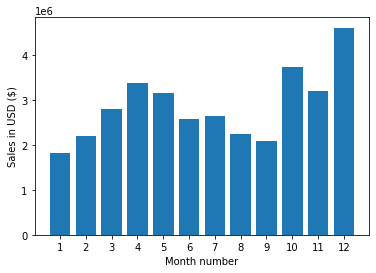

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

months = range(1,13)
print(months)

plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

## Question 2: What city sold the most product?

In [27]:
result = all_data.groupby('city').sum()
result

Quantity Ordered    Price Each   Month  Month2  \
city                                                                 
Atlanta (GA)                   16602  2.779908e+06  104794  104794   
Austin (TX)                    11153  1.809874e+06   69829   69829   
Boston (MA)                    22528  3.637410e+06  141112  141112   
Dallas (TX)                    16730  2.752628e+06  104620  104620   
Los Angeles (CA)               33289  5.421435e+06  208325  208325   
New York City (NY)             27932  4.635371e+06  175741  175741   
Portland (ME)                   2750  4.471893e+05   17144   17144   
Portland (OR)                  11303  1.860558e+06   70621   70621   
San Francisco (CA)             50239  8.211462e+06  315520  315520   
Seattle (WA)                   16553  2.733296e+06  104941  104941   

                           Sales  
city                              
Atlanta (GA)        2.795499e+06  
Austin (TX)         1.819582e+06  
Boston (MA)         3.661642e+06  
Dallas (TX)         2.767975e+06  
Los Angeles (CA)    5.452571e+06  
New York City (NY)  4.664317e+06  
Portland (ME)       4.497583e+05  
Portland (OR)       1.870732e+06  
San Francisco (CA)  8.262204e+06  
Seattle (WA)        2.747755e+06

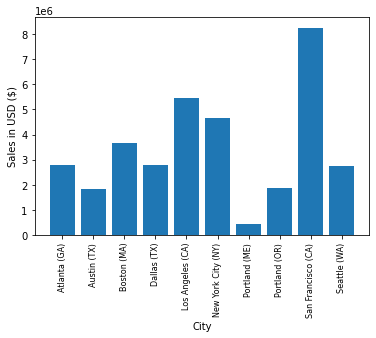

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

cities = [city for city, df in all_data.groupby(['city'])]

plt.bar(cities,result['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.show()

## Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [36]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

           Order Date                      Purchase Address  Month  Month2  \
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001      4       4   
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215      4       4   
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4       4   
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4       4   
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001      4       4   

    Sales              city  Hour  Minute  
0   23.90       Dallas (TX)     8      46  
2   99.99       Boston (MA)    22      30  
3  600.00  Los Angeles (CA)    14      38  
4   11.99  Los Angeles (CA)    14      38  
5   11.99  Los Angeles (CA)     9      27

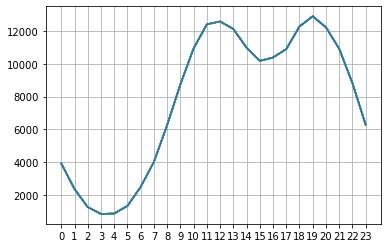

In [39]:
hours = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.show()